<i>Updated 29/Nov/2021</i> by Yoshihisa Nitta &nbsp; <img src="https://nw.tsuda.ac.jp/icons/nitta-email.gif" />


# Further Training of Cycle Generative Adversarial Network for VidTIMIT dataset with Tensorflow 2 on Google Colab (WGAN-GP)

Assuming that you have already executed CycleGAN_VidTIMIT_Train.ipynb, further train the Model. 

## VidTIMIT データセットに対して Cycle Generative Adversarial Network をGoogle Colab 上の Tensorflow 2 でさらに学習させる

既に CycleGAN_VidTIMIT_Train.ipynb を実行していることを前提とし、さらに学習を進める。





In [ ]:
MAX_EPOCHS = 50     # Change this value and run this ipynb many times

save_path = '/content/drive/MyDrive/ColabRun/CycleGAN_VidTIMIT01'
VERBOSE = False

In [ ]:
#! pip install tensorflow==2.7.0

In [ ]:
! pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 15.8 MB/s 


In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np

np.random.seed(2022)

# Check the Google Colab runtime environment

## Google Colab 実行環境を調べる

In [ ]:
! nvidia-smi
if VERBOSE:
    ! cat /proc/cpuinfo
    ! cat /etc/issue
    ! free -h

Tue Dec  7 21:31:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive from Google Colab

## Google Colab から GoogleDrive をマウントする

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if VERBOSE:
    ! ls /content/drive

# Download source file from Google Drive or nw.tsuda.ac.jp

Basically, <code>gdown</code> from Google Drive.
Download from nw.tsuda.ac.jp above only if the specifications of Google Drive change and you cannot download from Google Drive.

# Google Drive または nw.tsuda.ac.jp からファイルをダウンロードする

基本的に、Google Drive から <code>gdown</code> してください。
Google Drive の仕様が変わってダウンロードができない場合にのみ、nw.tsuda.ac.jp からダウンロードしてください。

In [ ]:
# Download source file
nw_path = './nw'
! rm -rf {nw_path}
! mkdir -p {nw_path}

if True:   # from Google Drive
    url_model =  'https://drive.google.com/uc?id=1aNvpPDNeDWYQFu_PA1kOtFlzcO5seHky'
    ! (cd {nw_path}; gdown {url_model})
else:      # from nw.tsuda.ac.jp
    URL_NW = 'https://nw.tsuda.ac.jp/lec/GoogleColab/pub'
    url_model = f'{URL_NW}/models/CycleGAN.py'
    ! wget -nd {url_model} -P {nw_path}

Downloading...
From: https://drive.google.com/uc?id=1aNvpPDNeDWYQFu_PA1kOtFlzcO5seHky
To: /content/nw/CycleGAN.py
100% 24.6k/24.6k [00:00<00:00, 19.7MB/s]


In [ ]:
if VERBOSE:
    ! cat {nw_path}/CycleGAN.py

# Preparing VidTIMIT dataset

Official WWW of VidTIMIT dataset: http://conradsanderson.id.au/vidtimit/

zip files of 2 persons of VidTIMIT dataset: <br />
https://zenodo.org/record/158963/files/fadg0.zip  <br />
https://zenodo.org/record/158963/files/faks0.zip  <br />

zip files mirrored on my Google Drive: <br />
https://drive.google.com/uc?id=1_Fv4p9MDNphMZMnLpEvtCtnwXgN8N5Cj <br />
https://drive.google.com/uc?id=1Y8j7ThPVqB0gbx4hb9aMEp9Ptr9wFuoz <br />

## VidTIMIT データセットを用意する

VidTIMIT データセットの公式ページ: http://conradsanderson.id.au/vidtimit/

VidTIMIT の2名の顔写真の zip ファイル: <br />
https://zenodo.org/record/158963/files/fadg0.zip <br />
https://zenodo.org/record/158963/files/faks0.zip <br />


自分の Google Drive 上にミラーした顔写真: <br />
https://drive.google.com/uc?id=1_Fv4p9MDNphMZMnLpEvtCtnwXgN8N5Cj <br />
https://drive.google.com/uc?id=1Y8j7ThPVqB0gbx4hb9aMEp9Ptr9wFuoz <br />



In [ ]:
# Download zip files
VidTIMIT_site = 'https://zenodo.org/record/158963/files/'
VidTIMIT_fnames = [ 'fadg0', 'faks0']

Mirrored_files = [
    'https://drive.google.com/uc?id=1_Fv4p9MDNphMZMnLpEvtCtnwXgN8N5Cj', 
    'https://drive.google.com/uc?id=1Y8j7ThPVqB0gbx4hb9aMEp9Ptr9wFuoz'
]

data_dir = './datasets'
! rm -rf $data_dir
! mkdir -p $data_dir

for i, fname in enumerate(VidTIMIT_fnames):
    fzip = fname + '.zip'
    if False:
        url = VidTIMIT_site + fzip
        !wget {url}
    else:
        url = Mirrored_files[i]
        !gdown {url}

    !unzip -q {fzip} -d {data_dir}

Downloading...
From: https://drive.google.com/uc?id=1_Fv4p9MDNphMZMnLpEvtCtnwXgN8N5Cj
To: /content/fadg0.zip
100% 81.6M/81.6M [00:01<00:00, 48.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y8j7ThPVqB0gbx4hb9aMEp9Ptr9wFuoz
To: /content/faks0.zip
100% 64.2M/64.2M [00:00<00:00, 66.4MB/s]


# Make DataGenerator from the images of VidTIMIT

## VidTIMIT の画像ファイルから DataGenerator を作る

In [ ]:
IMAGE_SIZE = 128

In [ ]:
import os
import glob

imgA_paths = glob.glob(os.path.join(data_dir, VidTIMIT_fnames[0], 'video/*/[0-9]*'))
imgB_paths = glob.glob(os.path.join(data_dir, VidTIMIT_fnames[1], 'video/*/[0-9]*'))

In [ ]:
import numpy as np

validation_split = 0.05

nA, nB = len(imgA_paths), len(imgB_paths)
splitA = int(nA * (1 - validation_split))
splitB = int(nB * (1 - validation_split))

np.random.shuffle(imgA_paths)
np.random.shuffle(imgB_paths)

train_imgA_paths = imgA_paths[:splitA]
test_imgA_paths = imgA_paths[splitA:]
train_imgB_paths = imgB_paths[:splitB]
test_imgB_paths = imgB_paths[splitB:]

In [ ]:
# Image: [-1, 1] --> [0, 1]
def M1P1_ZeroP1(imgs):
    imgs = (imgs + 1) * 0.5
    return np.clip(imgs, 0, 1)

# Image: [0, 1] --> [-1, 1]
def ZeroP1_M1P1(imgs):
    return imgs * 2 - 1

In [ ]:
from nw.CycleGAN import PairDataset

pair_flow = PairDataset(train_imgA_paths, train_imgB_paths, target_size=(IMAGE_SIZE, IMAGE_SIZE))
test_pair_flow = PairDataset(test_imgA_paths, test_imgB_paths, target_size=(IMAGE_SIZE, IMAGE_SIZE))

# Define the Neural Network Model

## ニューラルネットワーク・モデルを定義する

In [ ]:
from nw.CycleGAN import CycleGAN

gan = CycleGAN.load(save_path)

print(gan.epoch)

750


# Train

## 訓練する

# Further Training

# さらに学習を進める

In [ ]:
gan.train(
    pair_flow,
    epochs = MAX_EPOCHS,
    batch_size=1,
    run_folder = save_path,
    print_step_interval = 1000,
    save_epoch_interval = 50
)

Epoch 751/800 1000/2595 [D loss: 0.006 acc: 1.000][G loss: 2.562 adv: 1.797 recon: 0.064 id: 0.062 time: 0:03:45.376853
Epoch 751/800 2000/2595 [D loss: 0.003 acc: 1.000][G loss: 2.668 adv: 2.045 recon: 0.052 id: 0.053 time: 0:07:11.279277
Epoch 751/800 [D loss: 0.016 acc: 0.991][G loss: 2.667 adv: 1.883 recon: 0.065 id: 0.066 time: 0:09:14.769916
Epoch 752/800 1000/2595 [D loss: 0.007 acc: 1.000][G loss: 2.549 adv: 1.919 recon: 0.052 id: 0.053 time: 0:12:39.378950
Epoch 752/800 2000/2595 [D loss: 0.003 acc: 1.000][G loss: 2.490 adv: 1.876 recon: 0.051 id: 0.052 time: 0:16:06.596191
Epoch 752/800 [D loss: 0.016 acc: 0.991][G loss: 2.606 adv: 1.879 recon: 0.060 id: 0.062 time: 0:18:09.053658
Epoch 753/800 1000/2595 [D loss: 0.004 acc: 1.000][G loss: 2.489 adv: 1.830 recon: 0.055 id: 0.055 time: 0:21:36.872877
Epoch 753/800 2000/2595 [D loss: 0.004 acc: 1.000][G loss: 2.585 adv: 1.954 recon: 0.052 id: 0.053 time: 0:25:04.923162
Epoch 753/800 [D loss: 0.018 acc: 0.987][G loss: 2.689 adv: 

In [ ]:
! ls {save_path}/weights

combined-weights_100.h5  d_A-weights_600.h5   g_AB-weights_400.h5
combined-weights_150.h5  d_A-weights_650.h5   g_AB-weights_450.h5
combined-weights_1.h5	 d_A-weights_700.h5   g_AB-weights_500.h5
combined-weights_200.h5  d_A-weights_750.h5   g_AB-weights_50.h5
combined-weights_250.h5  d_A-weights_800.h5   g_AB-weights_550.h5
combined-weights_300.h5  d_A-weights.h5       g_AB-weights_5.h5
combined-weights_350.h5  d_B-weights_100.h5   g_AB-weights_600.h5
combined-weights_3.h5	 d_B-weights_150.h5   g_AB-weights_650.h5
combined-weights_400.h5  d_B-weights_1.h5     g_AB-weights_700.h5
combined-weights_450.h5  d_B-weights_200.h5   g_AB-weights_750.h5
combined-weights_500.h5  d_B-weights_250.h5   g_AB-weights_800.h5
combined-weights_50.h5	 d_B-weights_300.h5   g_AB-weights.h5
combined-weights_550.h5  d_B-weights_350.h5   g_BA-weights_100.h5
combined-weights_5.h5	 d_B-weights_3.h5     g_BA-weights_150.h5
combined-weights_600.h5  d_B-weights_400.h5   g_BA-weights_1.h5
combined-weights_650.h5  d

# Generate Images

## 画像を生成する

In [ ]:
# Display images
# 画像を表示する。
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def showImages(imgs, rows=-1, cols=-1, w=2, h=2):
    N = len(imgs)
    if rows < 0: rows = 1
    if cols < 0: cols = (N + rows -1) // rows
    fig, ax = plt.subplots(rows, cols, figsize=(w*cols, h*rows))
    idx = 0
    for row in range(rows):
        for col in range(cols) :
            if rows == 1 and cols == 1:
                axis = ax
            elif rows == 1:
                axis = ax[col]
            elif cols == 1:
                axis = ax[row]
            else:
                axis = ax[row][col]

            if idx < N:
                axis.imshow(imgs[idx])
            axis.axis('off')
            idx += 1
    plt.show()

A-->B-->A, ID


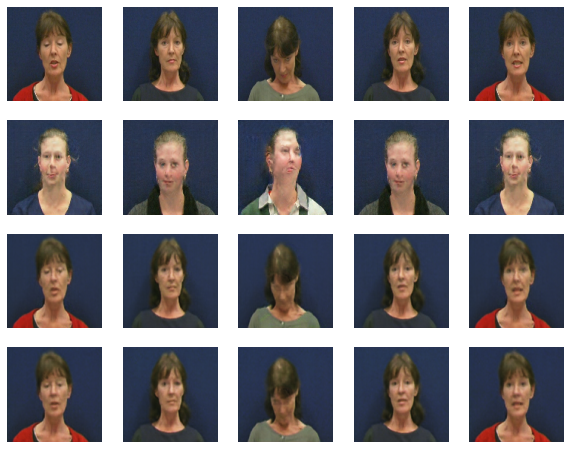

B-->A-->B, ID


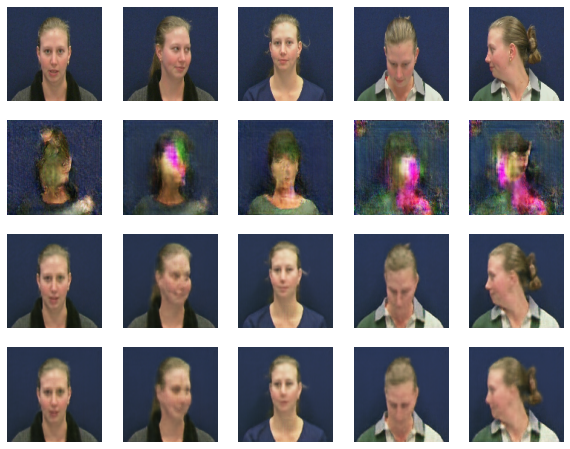

In [ ]:
# Display generated and cycle images.
# 生成画像とサイクル画像を表示する。

test_pairs = test_pair_flow[:5]

test_imgsA = test_pairs[:,0]
test_imgsB = test_pairs[:,1]

imgsAB = gan.generate_image_from_A(test_imgsA)
imgsBA = gan.generate_image_from_B(test_imgsB)

print('A-->B-->A, ID')
showImages(M1P1_ZeroP1(imgsAB), 4)

print('B-->A-->B, ID')
showImages(M1P1_ZeroP1(imgsBA), 4)

# Check the loss and accuracy of the training process.

## 学習過程のlossと精度を確認する

loss AB


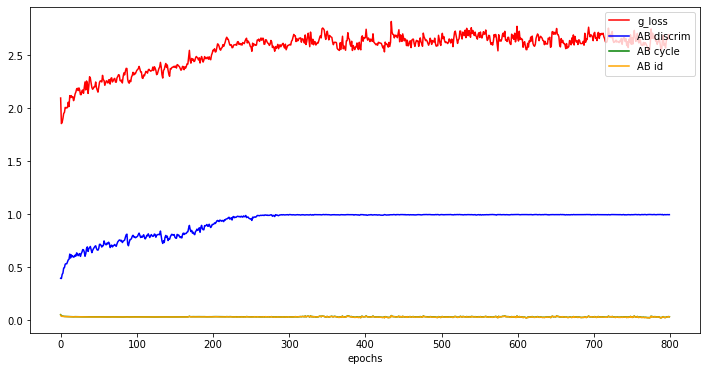

loss BA


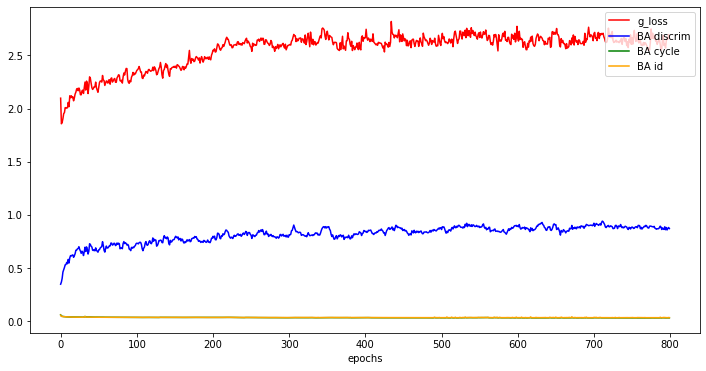

In [ ]:
# Display the graph of losses in training
%matplotlib inline

gan.showLoss()

# Check the saved files

## 保存されているファイルを確認する

In [ ]:
! ls -lR {save_path}

/content/drive/MyDrive/ColabRun/CycleGAN_VidTIMIT01:
total 2090
drwx------ 2 root root   4096 Dec  7 08:30 BAK
-rw------- 1 root root  27155 Nov 30 02:00 params_100.pkl
-rw------- 1 root root  40955 Nov 30 08:35 params_150.pkl
-rw------- 1 root root    413 Nov 29 12:52 params_1.pkl
-rw------- 1 root root  55105 Nov 30 18:35 params_200.pkl
-rw------- 1 root root  69205 Dec  1 03:22 params_250.pkl
-rw------- 1 root root  83356 Dec  2 07:39 params_300.pkl
-rw------- 1 root root  97456 Dec  2 14:25 params_350.pkl
-rw------- 1 root root    895 Nov 29 13:08 params_3.pkl
-rw------- 1 root root 111606 Dec  2 21:14 params_400.pkl
-rw------- 1 root root 125756 Dec  3 09:36 params_450.pkl
-rw------- 1 root root 139906 Dec  3 18:25 params_500.pkl
-rw------- 1 root root  13355 Nov 29 19:32 params_50.pkl
-rw------- 1 root root 154056 Dec  5 01:54 params_550.pkl
-rw------- 1 root root   1416 Nov 29 13:25 params_5.pkl
-rw------- 1 root root 168156 Dec  5 10:27 params_600.pkl
-rw------- 1 root root 182